# Taller Final: Predicción y Clasificación en la Industria Azucarera


*   Diego Alvarez
*   Jaison Leandro Avila
*   Johana Castillo





El propósito de este taller es aplicar los conceptos aprendidos en el curso de Análisis Cuantitativo, a partir de los datos suministrados por el Ingenio La Providencia, ubicado en el Valle del Cauca, uno de los principales productores de caña de azúcar en Colombia. Este conjunto de datos contiene 21,027 registros con 85 variables que abarcan aspectos clave del cultivo, prácticas agrícolas, condiciones climáticas, riego y rendimiento del cultivo. La caña de azúcar es relevante para la economía del Valle, representando el 60% de la producción nacional, siendo clave en la generación de empleo, producción de azúcar y biocombustibles. A través del análisis de estas variables, se busca predecir la producción y la calidad de la caña.  

#  Parte 1: Modelo de Regresión

In [36]:
#Cargar librerias
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
import seaborn as sns

In [37]:
###Importar base de datos de La Providencia
urlgithub = 'https://raw.githubusercontent.com/DiegoAlv9423/Taller_AC_2025/main/HISTORICO_SUERTES.xlsx'
db = pd.read_excel(urlgithub)

# Análisis exploratorio de los datos EDA

In [38]:
##Mostrar base de datos de La Providencia
db

,Período,Hacienda,Nombre,Zona,Tenencia,Suerte,Suelo,Area Neta,Dist Km,Variedad,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
0,201701,80493,LA CONCHA,IP02,51.0,002A,CANTARINA,6.00,4.3,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201701,81284,UKRANIA INCAUCA,IP05,81.0,039B,NaN,1.45,NaN,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201701,80203,EL AMPARO SAA,IP05,31.0,007,CORINTIAS,8.24,23.0,CC01-1228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201701,81380,SAN JUDAS INCAUCA,IP05,82.0,013A,NaN,1.05,66.5,CC01-1940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201701,80298,JAVA,IP06,31.0,025A,GALPON,4.53,17.0,RB73-2223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21022,202407,80102,LA PAZ,IP01,11.0,051B,LA PAZ,3.00,1.8,CC05-430,...,78.797,16.4,31.089,NaN,467.043,444.382,177.3,1037.8,542.2,1824.6
21023,202407,80102,LA PAZ,IP01,11.0,054C,LA PAZ,1.22,1.8,CC05-430,...,78.704,17.8,30.945,NaN,461.663,444.528,168.7,1041.6,536.4,1867.2
21024,202407,80102,LA PAZ,IP01,11.0,054E,LA PAZ,1.85,1.8,CC05-430,...,78.704,17.8,30.945,NaN,461.663,444.528,168.7,1041.6,536.4,1867.2
21025,202407,80104,SAMARIA,IP02,11.0,165,PALMIRA,31.42,3.5,CC05-430,...,78.720,17.8,31.040,NaN,467.911,444.839,177.3,1037.8,544.2,1843.9


In [39]:
##Verificar cantidad de observaciones y de variables
db.shape

(21027, 85)

In [40]:
##Verificar Cantidad de datos nulos de las variables
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Período                    21027 non-null  int64         
 1   Hacienda                   21027 non-null  int64         
 2   Nombre                     21027 non-null  object        
 3   Zona                       21027 non-null  object        
 4   Tenencia                   21026 non-null  float64       
 5   Suerte                     21027 non-null  object        
 6   Suelo                      17269 non-null  object        
 7   Area Neta                  21027 non-null  float64       
 8   Dist Km                    21022 non-null  float64       
 9   Variedad                   21027 non-null  object        
 10  Cod.Estado #               21027 non-null  int64         
 11  Cod.Estado                 21027 non-null  object        
 12  F.Si

# Identificación de variables relevantes

***Justificación de la selección de variables***

En el proceso de selección de variables para el análisis exploratorio, decidimos reducir el número de variables a un subconjunto más manejable de 84, como lo presenta la base inicial, con el objetivo de realizar un primer barrido sin perder la capacidad de obtener información relevante sobre los factores que afectan la productividad y calidad de la caña de azúcar. Este filtrado inicial se realizó basándonos en artículos científicos y fuentes en línea, considerando que las variables elegidas tienen una relación directa con los dos indicadores clave del estudio: Toneladas de caña por hectárea (TCH) y Porcentaje de sacarosa (%Sac.Caña). Variables como Lluvias Ciclo, Temperaturas (media, máxima y mínima), Radiación Solar y Dosis Madurante son cruciales para el crecimiento y maduración de la caña, ya que influyen directamente en la fotosíntesis, la acumulación de sacarosa y la productividad del cultivo (Buenaventura, C. 2000). Además, Brix, %Fibra Caña y %AR Jugo proporcionan información clave sobre la calidad del jugo de caña y la eficiencia de extracción de azúcar, lo que impacta en la calidad del producto final (Bermúdez Escobar, 2017).

Al reducir el número de variables, evitamos trabajar con datos menos relevantes o redundantes, como el tipo de suelo, la variedad de caña o el Tipo Quema, que tienen una influencia indirecta en los indicadores clave del estudio. Este enfoque simplifica el análisis exploratorio y permite centrarse en las variables más pertinentes para la productividad (TCH) y calidad (sacarosa) de la caña (Larrahondo, J. E., 1995).

Posteriormente, utilizaremos técnicas estadísticas más avanzadas para refinar nuestra selección de variables y confirmar aquellas que realmente afectan los resultados finales de la cosecha. Este proceso garantiza que nuestro análisis sea más eficiente y enfocado, sin perder la capacidad de capturar los factores más influyentes en el rendimiento y calidad del cultivo.

*Referencias:*



*   Bermúdez Escobar, I. C. (2027). La caña de azúcar en el Valle del Cauca: Una historia de su desarrollo industrial. Credencial Historia, 92. Recuperado de https://www.banrepcultural.org/biblioteca-virtual/credencial-historia/numero-92/la-cana-de-azucar-en-el-valle-del-cauca
*   Buenaventura, C. (2000). Factores climáticos que afectan el Crecimiento, Producción y desarrollo de la caña de azucar. AGROSAVIA.
https://repository.agrosavia.co/bitstream/handle/20.500.12324/19649/26487_13040.pdf?sequence=1
*   Larrahondo, J. E. (1995). Calidad de la caña de azúcar. El cultivo de la caña en la zona azucarera de Colombia. Eds. Cassalett, C, 337-354.






In [127]:
# Selección de variables relevantes
X = db[['Zona', 'Suelo', 'Variedad', 'F.Siembra', 'Cultivo', 'Producto', 'Dosis Madurante', 'Semanas mad.', 'Sac.Caña Precosecha', '%Sac.Caña', 'TCH', '%ATR', '%Fibra Caña', '%AR Jugo', '%ME Tot', 'Brix', 'Pureza', 'Vejez', 'Tipo Quema', 'T.Corte', 'Num.Riegos', 'Cerca de', 'M3 Riego', 'DDUlt.Riego','Lluvias Ciclo', '%Infest.Diatrea',  'Urea 46%', 'Temp. Media Ciclo', 'Temp Max Ciclo',  'Temp Min Ciclo', 'Humedad Rel Media Ciclo', 'Radiacion Solar Ciclo' , 'Oscilacion Temp Ciclo', 'Evaporacion Ciclo']]
X.columns



Index(['Zona', 'Suelo', 'Variedad', 'F.Siembra', 'Cultivo', 'Producto',
       'Dosis Madurante', 'Semanas mad.', 'Sac.Caña Precosecha', '%Sac.Caña',
       'TCH', '%ATR', '%Fibra Caña', '%AR Jugo', '%ME Tot', 'Brix', 'Pureza',
       'Vejez', 'Tipo Quema', 'T.Corte', 'Num.Riegos', 'Cerca de', 'M3 Riego',
       'DDUlt.Riego', 'Lluvias Ciclo', '%Infest.Diatrea', 'Urea 46%',
       'Temp. Media Ciclo', 'Temp Max Ciclo', 'Temp Min Ciclo',
       'Humedad Rel Media Ciclo', 'Radiacion Solar Ciclo',
       'Oscilacion Temp Ciclo', 'Evaporacion Ciclo'],
      dtype='object')

In [128]:
X.shape

(21027, 34)

# Valores faltantes y posibles outliers

In [129]:
#Porcentaje de valores faltantes en cada una de las variables seleccionadas
miss_data = X.isnull().sum() / len(X) * 100
miss_data = miss_data[miss_data > 0]  # Mostrar solo las variables con valores faltantes
print(miss_data)

Suelo                      17.872259
Cultivo                     0.009512
Producto                   46.502116
Dosis Madurante             0.494602
Semanas mad.               46.487849
Sac.Caña Precosecha         5.221858
%Sac.Caña                   2.135350
%ATR                        2.482522
%Fibra Caña                 8.836258
%AR Jugo                   10.101298
%ME Tot                     8.179959
Brix                        1.269796
Pureza                      1.279308
Vejez                      11.627907
Num.Riegos                 59.870643
Cerca de                    0.599230
%Infest.Diatrea            73.367575
Urea 46%                   96.561564
Temp. Media Ciclo          78.456271
Temp Max Ciclo             78.456271
Temp Min Ciclo             78.456271
Humedad Rel Media Ciclo    78.456271
Radiacion Solar Ciclo      78.456271
Oscilacion Temp Ciclo      78.456271
Evaporacion Ciclo          78.456271
dtype: float64


In [98]:
miss_data.shape

(25,)

De las variables seleccionadas, 25 de ellas tienen valores faltantes. Procedemos a verificar cuales superan el 70% y las aliminamos, y aunque algunas de ellas son importantes para el análisis, al no contener información, nos lleva a que las eliminemos porque no nos serviria para el modelo.

**Variables con un alto porcentaje de valores faltantes:**


*   Urea 46% (96.56%), Temp. Media Ciclo (78.46%), Temp. Max Ciclo (78.46%), Temp. Min Ciclo (78.46%), Humedad Rel Media Ciclo (78.46%), Radiación Solar Ciclo (78.46%), Oscilación Temp Ciclo (78.46%), Evaporación Ciclo (78.46%) y %Infest.Diatrea (73.37%) tienen más del 70% de valores faltantes. Estas variables no aportan suficiente información (Se procede a eliminarlas para asegurar que el análisis se base en datos consistentes)


In [142]:
##Antes de verificar los outliers, se eliminan las variables que contienen mas de un 60% de datos faltantes.

# Porcentaje de valores faltantes
miss_data = X.isnull().sum() / len(X) * 100

# Variables que tienen más del 70% de valores faltantes
vardrop = miss_data[miss_data >= 50].index
print(f"Variables a eliminar por tener más del 70% de valores faltantes: {vardrop}")

# Paso 3: Eliminar las columnas identificadas
X_clean = X.drop(vardrop, axis=1)

# Paso 4: Verificar el nuevo tamaño del DataFrame después de eliminar columnas
print(f"Tamaño de X antes: {X.shape}")
print(f"Tamaño de X después de eliminar columnas: {X_clean.shape}")


Variables a eliminar por tener más del 70% de valores faltantes: Index(['Num.Riegos', '%Infest.Diatrea', 'Urea 46%', 'Temp. Media Ciclo',
       'Temp Max Ciclo', 'Temp Min Ciclo', 'Humedad Rel Media Ciclo',
       'Radiacion Solar Ciclo', 'Oscilacion Temp Ciclo', 'Evaporacion Ciclo'],
      dtype='object')
Tamaño de X antes: (21027, 34)
Tamaño de X después de eliminar columnas: (21027, 24)


In [143]:
#verificar variables finales
miss_data_X_clean = X_clean.isnull().sum() / len(X_clean) * 100
print(miss_data_X_clean)


Zona                    0.000000
Suelo                  17.872259
Variedad                0.000000
F.Siembra               0.000000
Cultivo                 0.009512
Producto               46.502116
Dosis Madurante         0.494602
Semanas mad.           46.487849
Sac.Caña Precosecha     5.221858
%Sac.Caña               2.135350
TCH                     0.000000
%ATR                    2.482522
%Fibra Caña             8.836258
%AR Jugo               10.101298
%ME Tot                 8.179959
Brix                    1.269796
Pureza                  1.279308
Vejez                  11.627907
Tipo Quema              0.000000
T.Corte                 0.000000
Cerca de                0.599230
M3 Riego                0.000000
DDUlt.Riego             0.000000
Lluvias Ciclo           0.000000
dtype: float64


In [144]:
# Identificación de outliers
X_clean.describe()

,F.Siembra,Dosis Madurante,Semanas mad.,Sac.Caña Precosecha,%Sac.Caña,TCH,%ATR,%Fibra Caña,%AR Jugo,%ME Tot,Brix,Pureza,Vejez,M3 Riego,DDUlt.Riego,Lluvias Ciclo
count,21027,20923.000000,11252.000000,19929.000000,20578.000000,21027.000000,20505.000000,19169.000000,18903.000000,19307.000000,20760.000000,20758.000000,18582.000000,21027.000000,21027.000000,21027.000000
mean,2015-03-11 18:18:44.839492096,0.536335,9.588708,7.802876,12.320202,129.608509,13.718671,15.275538,0.737819,8.600761,13.130479,77.805153,12.294125,25725.851363,45.997717,526.176110
min,1986-04-30 00:00:00,0.000000,-2.000000,0.000000,7.086000,1.573653,7.750000,0.000000,0.100000,0.200000,0.000000,0.000000,0.017000,0.000000,0.000000,0.000000
25%,2013-03-13 00:00:00,0.000000,6.571428,0.000000,11.619000,108.691426,13.015800,14.327400,0.568600,7.431900,13.470875,83.517250,2.108000,0.000000,0.000000,0.000000
50%,2015-11-10 00:00:00,0.600000,8.571428,0.000000,12.370650,129.479600,13.753100,15.314600,0.700000,8.666000,14.310950,85.525000,2.737000,0.000000,0.000000,450.000000
75%,2018-08-07 00:00:00,1.000000,11.142857,16.960100,13.087500,150.407607,14.471600,16.398900,0.860300,10.025000,15.043925,86.969475,10.756750,24841.920000,72.000000,921.000000
max,2023-09-08 00:00:00,5.000000,96.285714,44.776800,18.400000,401.045947,144.449600,32.212000,2.370000,67.514000,19.323000,147.497100,205.650000,772599.600000,853.000000,3917.000000
std,NaN,0.539796,5.585010,8.507614,1.145738,32.846029,1.451582,2.493603,0.238630,2.482570,4.238401,24.487124,20.993880,57539.237598,76.510120,551.550097


**Análisis preliminar: **
Algunas variables tienen una gran variabilidad en su distribución. Por ejemplo:

*  *Dosis Madurante* tiene un mínimo de 0, un máximo de 5 y una desviación estándar bastante alta (0.539796), lo que sugiere que podría haber una distribución sesgada.

*   *Semanas mad.* tiene un rango desde -2 hasta 96.28, lo que sugiere la presencia de valores atípicos (outliers).
*   *Sac.Caña Precosecha, %Sac.Caña, %ATR, %Fibra Caña,* tienen un rango relativamente restringido en comparación con algunas de las variables más dispersas.

*  Variables como *%Sac.Caña, %ATR, Brix*, y otras tienen una media cercana a su mediana (50%), lo que indica que no están muy sesgadas.

Número de variables numéricas con datos: 15


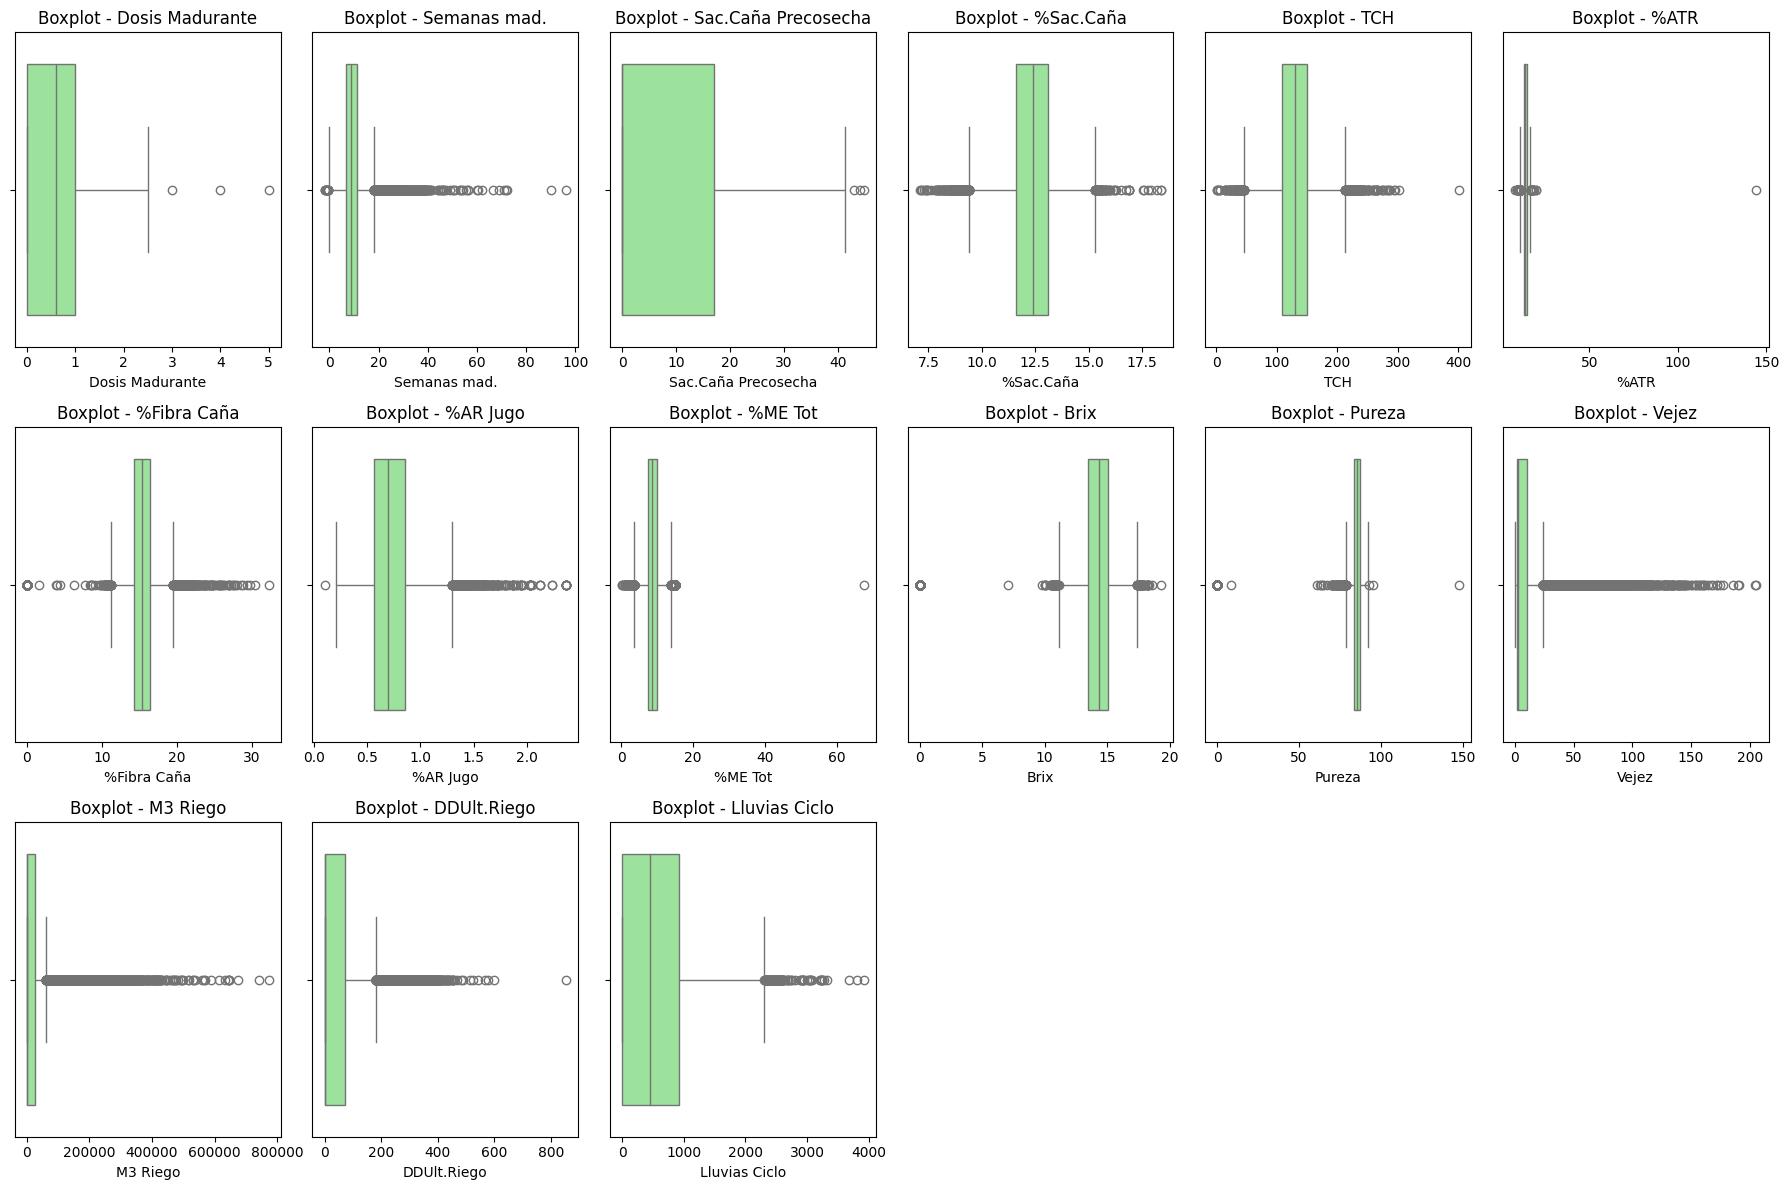

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get numerical columns from X_clean, ensuring they exist
num_columns = X_clean.select_dtypes(include=['float64', 'int64']).columns
numerical_columns_clean = [col for col in num_columns if col in X_clean.columns and X_clean[col].notnull().any()]
print(f'Número de variables numéricas con datos: {len(numerical_columns_clean)}')

# Calculate the number of rows and columns for visualization
n = len(numerical_columns_clean)
ncols = 6
nrows = (n // ncols) + (n % ncols > 0)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 12))
axes = axes.flatten()

# Create boxplots for each variable
for i, col in enumerate(numerical_columns_clean):
    sns.boxplot(x=X_clean[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Boxplot - {col}')

# Remove empty subplots
for i in range(n, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# **Jaison** podrias explicar estas dos graficas, mencionando los outliers?

# Dividir las variables para cada variable dependiente

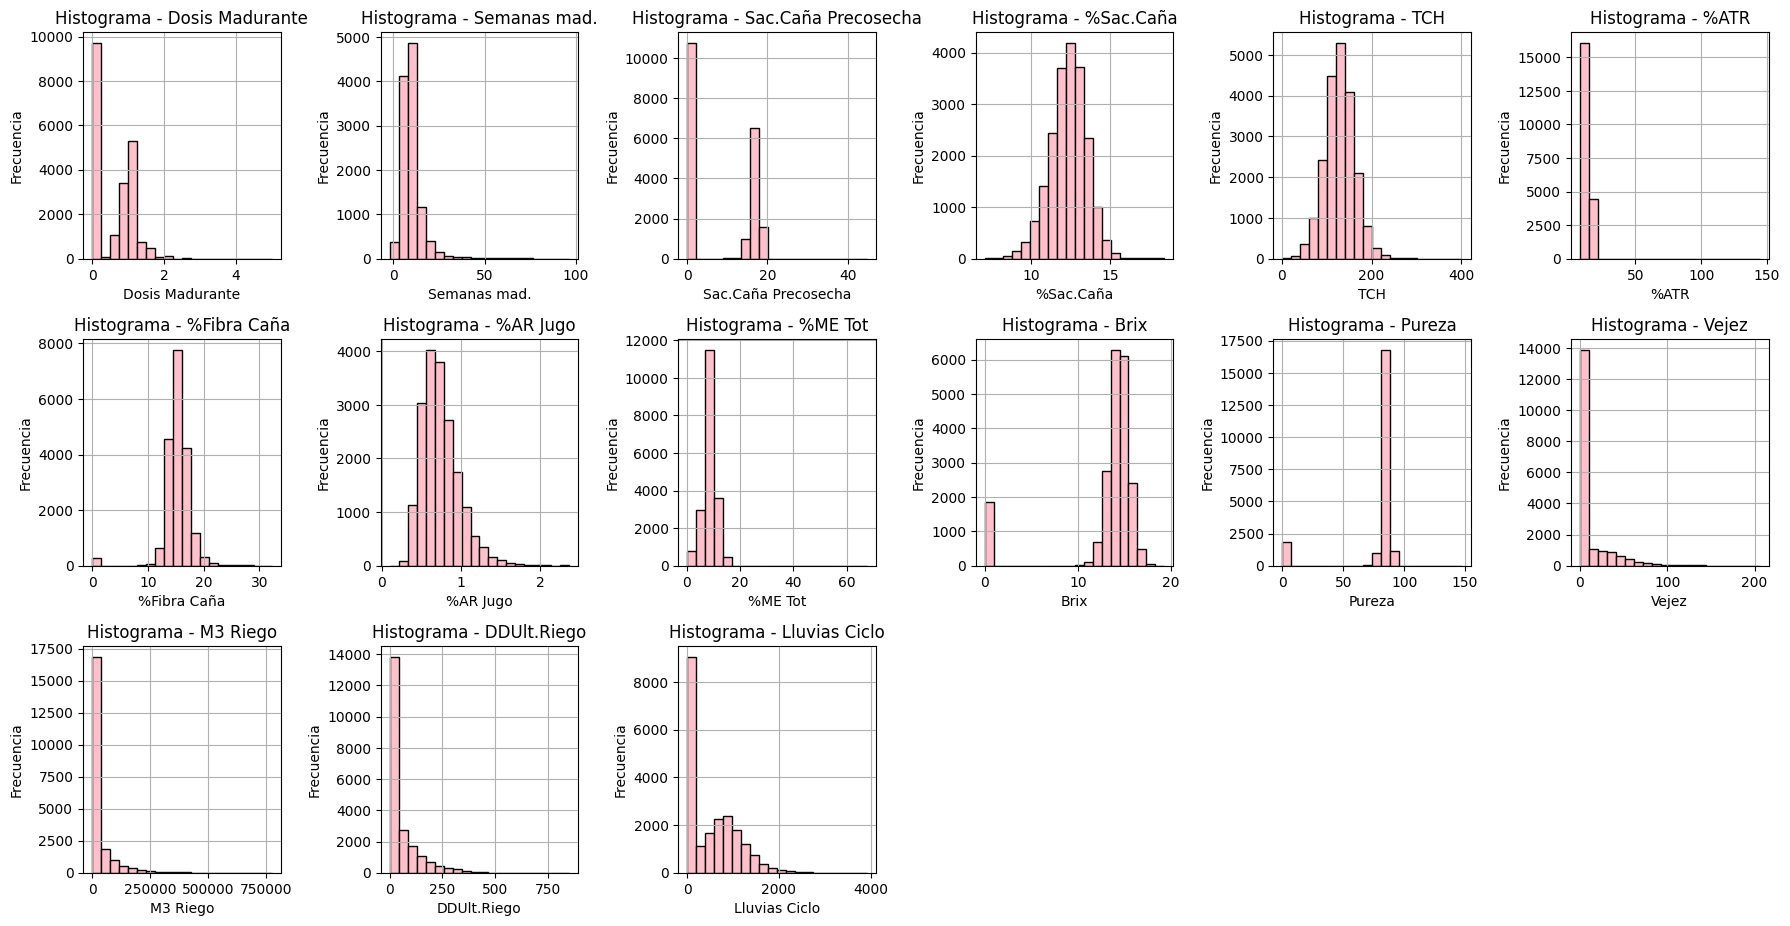

In [147]:
# Verificar outliers (Histograma)
import matplotlib.pyplot as plt

# Seleccionar las columnas numéricas
numerical_columns = X_clean.select_dtypes(include=['float64', 'int64']).columns

# Crear subgráficos para cada histograma
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(18, 12))
axes = axes.flatten()

# Crear los histogramas
for i, col in enumerate(numerical_columns):
    X_clean[col].hist(ax=axes[i], bins=20, color='pink', edgecolor='black')
    axes[i].set_title(f'Histograma - {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
# Eliminar subgráficos vacíos
for i in range(n, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [149]:
# Ver la curtosis de cada columna
print(X_clean[numerical_columns].kurt())

Dosis Madurante          -0.987735
Semanas mad.             25.308071
Sac.Caña Precosecha      -1.857247
%Sac.Caña                 0.602118
TCH                       0.782591
%ATR                   3207.748838
%Fibra Caña              18.473459
%AR Jugo                  2.844264
%ME Tot                  16.760194
Brix                      5.291701
Pureza                    6.125441
Vejez                    10.641665
M3 Riego                 21.667312
DDUlt.Riego               5.005611
Lluvias Ciclo             0.401594
dtype: float64


El análisis de asimetria nos permite corroborar lo que se está mostrando en los gráficos de boxplot e histogramas, donde Eliminar las variables %ATR y Semanas mad. presentan una asimetría extremadamente alta y una distribución sesgada, probablemente debido a outliers o valores atípicos. (Eliminar estas dos variables)

In [152]:
# Eliminar las variables '%ART' y 'Semanas mad.' de X_clean
X_clean = X_clean.drop(['%ART', 'Semanas mad.'], axis=1, errors='ignore')


In [153]:
X_clean.columns

Index(['Zona', 'Suelo', 'Variedad', 'F.Siembra', 'Cultivo', 'Producto',
       'Dosis Madurante', 'Sac.Caña Precosecha', '%Sac.Caña', 'TCH', '%ATR',
       '%Fibra Caña', '%AR Jugo', '%ME Tot', 'Brix', 'Pureza', 'Vejez',
       'Tipo Quema', 'T.Corte', 'Cerca de', 'M3 Riego', 'DDUlt.Riego',
       'Lluvias Ciclo'],
      dtype='object')

In [159]:
#verificar variables finales
miss_data_X_clean = X_clean.isnull().sum() / len(X_clean) * 100
print(miss_data_X_clean)

Zona                    0.000000
Suelo                  17.872259
Variedad                0.000000
F.Siembra               0.000000
Cultivo                 0.009512
Producto               46.502116
Dosis Madurante         0.494602
Sac.Caña Precosecha     5.221858
%Sac.Caña               2.135350
TCH                     0.000000
%ATR                    2.482522
%Fibra Caña             8.836258
%AR Jugo               10.101298
%ME Tot                 8.179959
Brix                    1.269796
Pureza                  1.279308
Vejez                  11.627907
Tipo Quema              0.000000
T.Corte                 0.000000
Cerca de                0.599230
M3 Riego                0.000000
DDUlt.Riego             0.000000
Lluvias Ciclo           0.000000
dtype: float64


#  **Jaison** Podrías verificar de estos datos que todavia contienen un porcentaje de NA si los eliminamos o no? o que otra medida tomamos para eliminar?

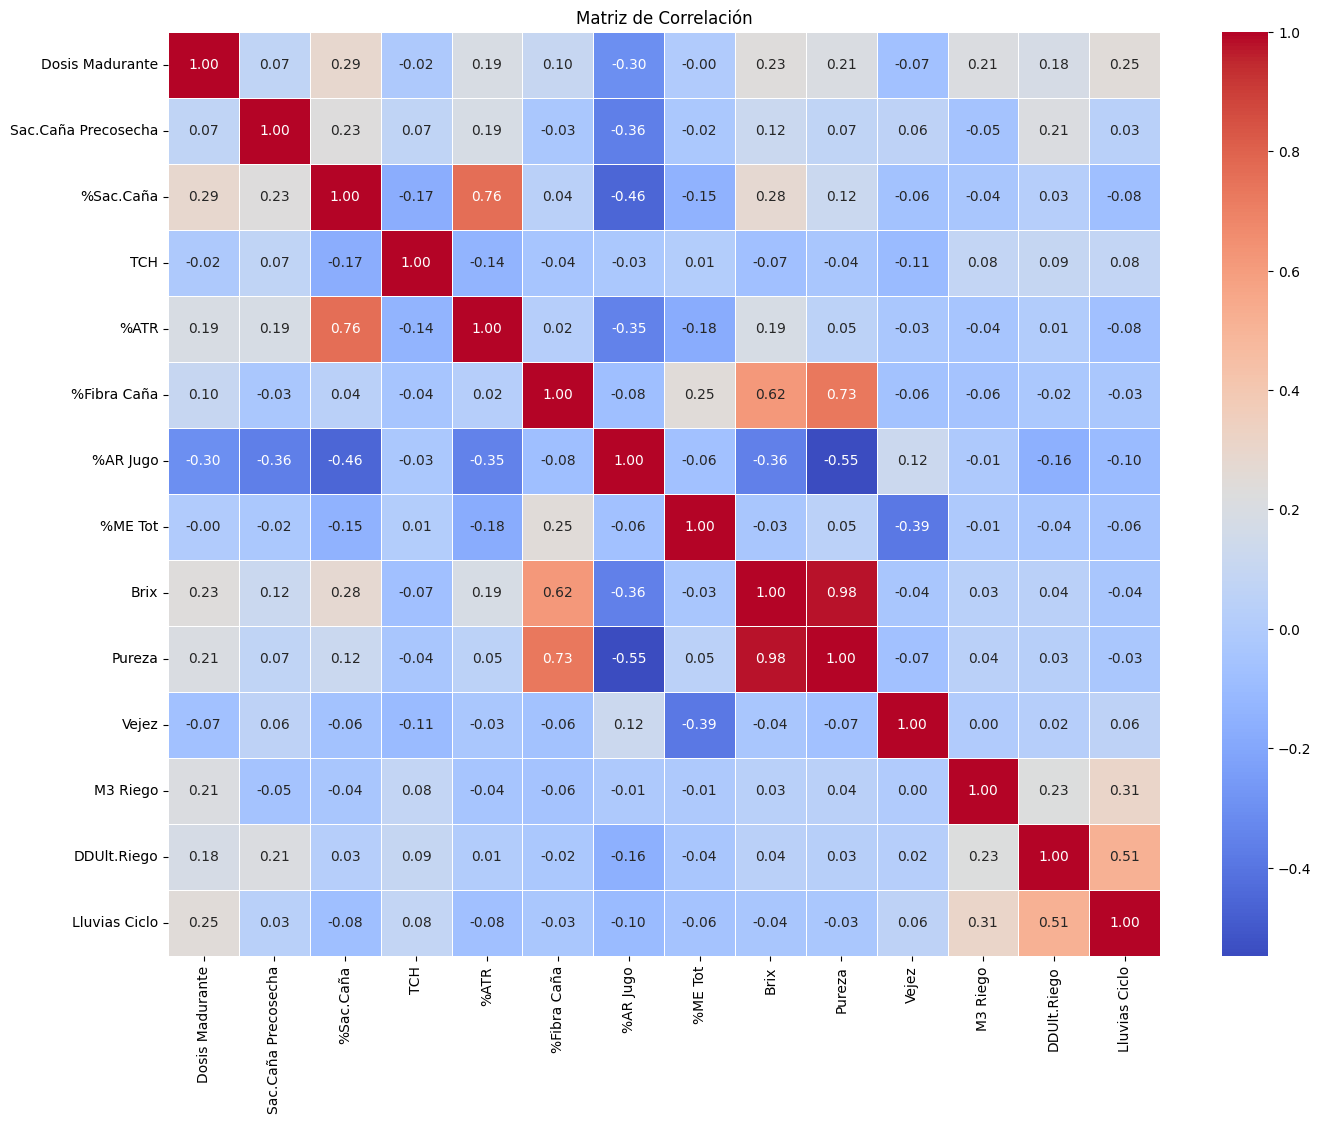

In [156]:
# Calcular la matriz de correlación
numerical_columns = X_clean.select_dtypes(include=['float64', 'int64']).columns

# Calcular la matriz de correlación
correlation_matrix = X_clean[numerical_columns].corr()

# Visualizar la matriz de correlación con un heatmap
import seaborn as sns
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


# **Jaison**Podrías tomar una decisi+on con esta matriz? o que hacemos?

In [158]:
X_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Zona                 21027 non-null  object        
 1   Suelo                17269 non-null  object        
 2   Variedad             21027 non-null  object        
 3   F.Siembra            21027 non-null  datetime64[ns]
 4   Cultivo              21025 non-null  object        
 5   Producto             11249 non-null  object        
 6   Dosis Madurante      20923 non-null  float64       
 7   Sac.Caña Precosecha  19929 non-null  float64       
 8   %Sac.Caña            20578 non-null  float64       
 9   TCH                  21027 non-null  float64       
 10  %ATR                 20505 non-null  float64       
 11  %Fibra Caña          19169 non-null  float64       
 12  %AR Jugo             18903 non-null  float64       
 13  %ME Tot              19307 non-

# TAREA: Visualizar la distribución de las variables de interés (TCH y %Sac.Caña). Análizar y mejorar los gráficos. Cambiar colores y mejorar los gráficos #   **Diego**

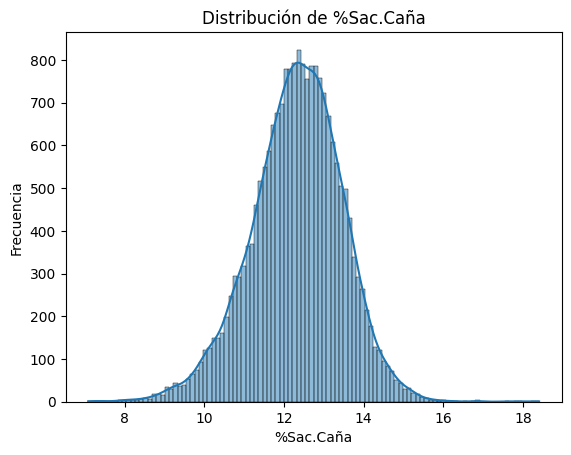

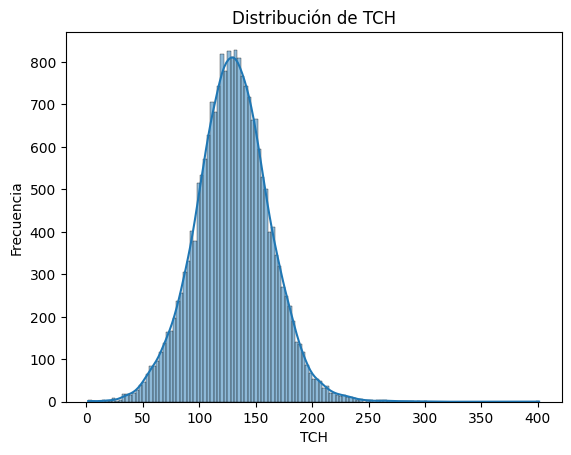

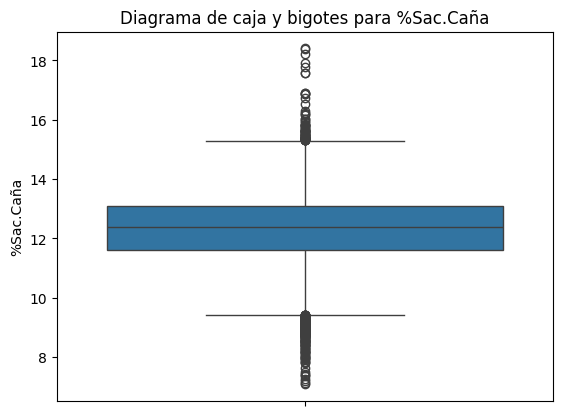

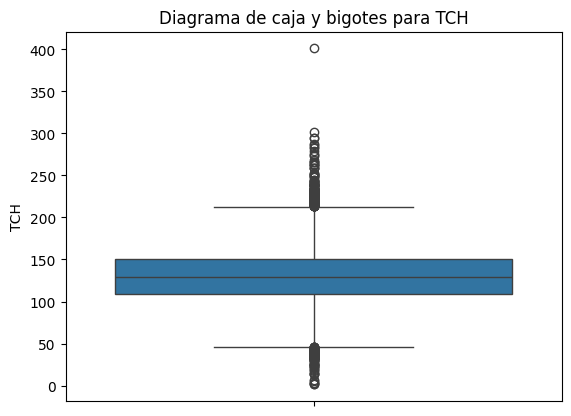

          %Sac.Caña           TCH
count  20578.000000  21027.000000
mean      12.320202    129.608509
std        1.145738     32.846029
min        7.086000      1.573653
25%       11.619000    108.691426
50%       12.370650    129.479600
75%       13.087500    150.407607
max       18.400000    401.045947


In [ ]:
# Parte 1: Distribución de las variables de interés ('%Sac.Caña' y 'TCH')

import matplotlib.pyplot as plt
# Análisis de distribución de '%Sac.Caña'
sns.histplot(df['%Sac.Caña'], kde=True)
plt.title('Distribución de %Sac.Caña')
plt.xlabel('%Sac.Caña')
plt.ylabel('Frecuencia')
plt.show()

# Análisis de distribución de 'TCH'
sns.histplot(df['TCH'], kde=True)
plt.title('Distribución de TCH')
plt.xlabel('TCH')
plt.ylabel('Frecuencia')
plt.show()

#Diagrama de caja y bigotes para '%Sac.Caña'
sns.boxplot(y=df['%Sac.Caña'])
plt.title('Diagrama de caja y bigotes para %Sac.Caña')
plt.show()

#Diagrama de caja y bigotes para 'TCH'
sns.boxplot(y=df['TCH'])
plt.title('Diagrama de caja y bigotes para TCH')
plt.show()

# Resumen estadístico de '%Sac.Caña' y 'TCH'
print(df[['%Sac.Caña', 'TCH']].describe())


# Desarrollo de Modelos:



*   Ajustar modelos de regresión lineal para predecir TCH y %Sac.Caña.
*   Analizar la significancia de las variables, interpretar los coeficientes y evaluar los supuestos del modelo (linealidad, homocedasticidad, normalidad de errores, etc.).  **TCH  JAISON**

* Analizar la significancia de las variables, interpretar los coeficientes y evaluar los supuestos del modelo (linealidad, homocedasticidad, normalidad de errores, etc.).  **%Sac.Caña Johana**

* Diagnosticar posibles problemas como la multicolinealidad o la presencia de observaciones atípicas, y proponer soluciones (por ejemplo, técnicas de regularización).   **JOHANA SAC%** **JAISON TCH**

# Validación y Evaluación:

*  Utilizar estrategias de validación (holdout y/o validación cruzada) para evaluar el desempeño del modelo.
* Calcular al menos dos métricas de evaluación apropiadas (por ejemplo, R², RMSE, MAE) y discutir los resultados. **(1PERSONA DIEGO)**

#  Parte 2: Modelo de Clasificación (PRÓXIMA SEMANA)

*   **Creación de Categorías:**

*Definir umbrales para transformar las variables continuas TCH y %Sac.Caña en categorías: alto, medio y bajo. Justificar la metodología empleada para definir estos cortes (por ejemplo, percentiles, criterios de negocio, etc.).*


* **Desarrollo de Modelos de Clasificación:**

Ajustar un modelo de regresión logística y/o aplicar el algoritmo K-Nearest Neighbors (KNN) para clasificar las observaciones según los niveles definidos.
Empleando regularización, analizar la importancia de las variables predictoras en el desempeño de la clasificación. *texto en cursiva*

*  **Validación y Evaluación:**

Emplear una estrategia de validación (por ejemplo, validación cruzada) y justificar la elección.
Reportar y analizar métricas de evaluación para clasificación (accuracy, precision, recall, F1-score, kappa.). *texto en cursiva*